In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys 
import os

# TODO: make more pythonic
# this line walks up file directory so rule-vetting is cwd
# Currently this breaks if chunk is run multiple times
os.chdir(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))))
print(os.getcwd())

/accounts/grad/wtorous/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


/accounts/grad/wtorous/rule-vetting


In [263]:
import rulevetting.api.viz as viz
from rulevetting.projects.csi_pecarn.eda_dataset import Dataset

In [264]:
dfs = Dataset().get_data(keep_na=False)

/accounts/grad/wtorous/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
/accounts/grad/wtorous/rule-vetting/rulevetting/projects/csi_pecarn/helper.py:135: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[base_av+'_improved'] = df[robust_av+'_binary'].copy()


False
True
False
False


/accounts/grad/wtorous/rule-vetting/rulevetting/projects/csi_pecarn/eda_dataset.py:370: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  preprocessed_data = cache(self.preprocess_data)(cleaned_data, **default_kwargs['preprocess_data'])


In [265]:
eda_df = dfs[0]

In [266]:
posthoc_columns = [col for col in eda_df.columns if 'posthoc' in col]
eda_df.drop(posthoc_columns,axis=1,inplace=True)

In [267]:
print(eda_df.shape)

(1956, 337)


In [268]:
outcome_def = 'csi_injury'

In [272]:
# get list of columns with only two recorded outcomes
binary_columns = eda_df.columns[eda_df.nunique()==2]
binary_eda_data = eda_df.loc[:,binary_columns].copy() 

cont_columns = eda_df.columns[eda_df.nunique()!=2]
cont_eda_data = eda_df.loc[:,cont_columns].copy()
cont_eda_data.loc[:,outcome_def] = eda_df.loc[:,outcome_def].copy() #add binary outcome indicator back in

In [273]:
# outcome indicator is double counted
print(eda_df.shape)
print(binary_eda_data.shape)
print(cont_eda_data.shape)

(1956, 337)
(1956, 292)
(1956, 46)


In [214]:
print(cont_eda_data.head())

                                  EMSEstimateTime_ems  TotalGCSManual_ems  \
id     case_id site control_type                                            
110009 110009  1    case                          NaN                 NaN   
110017 110017  1    case                          NaN                 NaN   
110001 110001  1    case                          6.0                 3.0   
110019 110019  1    case                          NaN                 NaN   
110012 110012  1    case                          4.0                 NaN   

                                  GCSEye_ems  VerbalGCS_ems  MotorGCS_ems  \
id     case_id site control_type                                            
110009 110009  1    case                 NaN            NaN           NaN   
110017 110017  1    case                 4.0            5.0           6.0   
110001 110001  1    case                 NaN            NaN           NaN   
110019 110019  1    case                 NaN            NaN           NaN  

In [215]:
print(np.unique(eda_df.index.get_level_values('control_type')))

['case' 'ems' 'moi' 'ran']


In [216]:
# Summary EDA

In [245]:
eda_df.describe()

,AlteredMentalStatus,LOC,FocalNeuroFindings,PainNeck,PosMidNeckTenderness,TenderNeck,Torticollis,SubInj_Head,SubInj_Face,SubInj_Ext,...,TenderNeck_improved,Torticollis_improved,SubInj_Head_improved,SubInj_Face_improved,SubInj_Ext_improved,SubInj_TorsoTrunk_improved,VeryYoung,NonVerbal,YoungAdult,HighRiskFallDownStairs
count,1912.000000,1798.000000,1757.000000,1853.000000,1906.000000,1906.000000,1820.000000,1936.000000,1936.000000,1936.000000,...,1912.000000,1821.000000,1937.000000,1936.000000,1936.000000,1937.000000,1956.000000,1956.000000,1956.000000,1956.000000
mean,0.186715,0.389321,0.111554,0.356719,0.292760,0.380378,0.056593,0.126550,0.045971,0.099690,...,0.025105,0.009885,0.036138,0.005682,0.014979,0.026329,0.061861,0.193763,0.508691,0.019427
std,0.389785,0.487732,0.314906,0.479160,0.455148,0.485607,0.231128,0.332554,0.209476,0.299664,...,0.156484,0.098956,0.186683,0.075183,0.121501,0.160154,0.240964,0.395346,0.500052,0.138057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [275]:
binary_imputed_data = binary_eda_data.fillna(0)
print(binary_eda_data.shape, binary_imputed_data.shape)
binary_corrs = binary_imputed_data.corr(method='spearman')
cont_corrs = cont_eda_data.corr(method='spearman')

print(binary_imputed_data.columns)

(1956, 292) (1956, 292)
Index(['AlteredMentalStatus', 'LOC', 'FocalNeuroFindings', 'PainNeck',
       'PosMidNeckTenderness', 'TenderNeck', 'Torticollis', 'SubInj_Head',
       'SubInj_Face', 'SubInj_Ext',
       ...
       'MinorInjuriesFlank_improved', 'PtTenderNeckPos_improved',
       'PtTenderNeckLevelC6_improved', 'PtTenderNeck_improved',
       'PtTender_improved', 'VeryYoung', 'NonVerbal', 'YoungAdult',
       'HighRiskFallDownStairs', 'PtCompPainNeck_robust'],
      dtype='object', length=292)


/accounts/grad/wtorous/.local/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'Spearman Correlation of Binary Covariates with Mean Imputation')

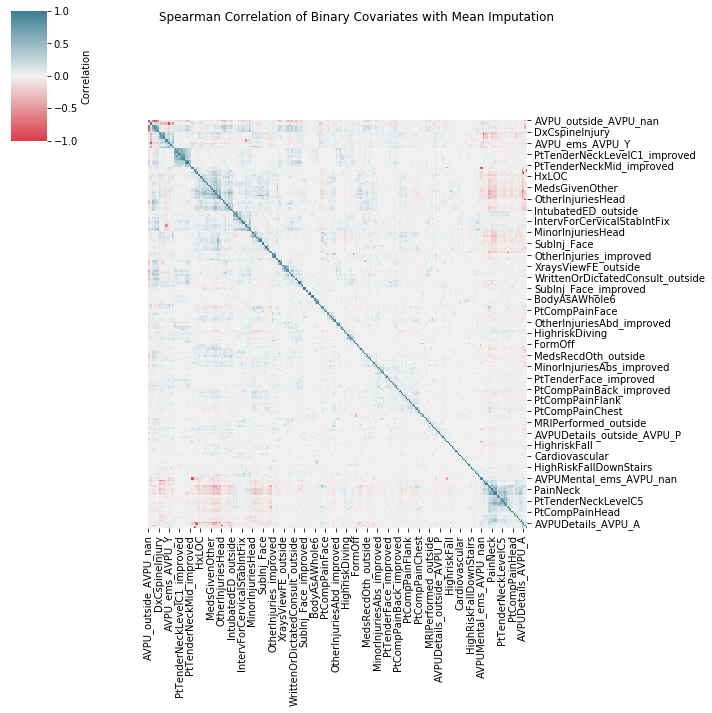

In [276]:
binary_corrmap = sns.clustermap(binary_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
binary_corrmap.ax_row_dendrogram.set_visible(False)
binary_corrmap.ax_col_dendrogram.set_visible(False)
binary_corrmap.fig.suptitle("Spearman Correlation of Binary Covariates with Mean Imputation")

ValueError: The condensed distance matrix must contain only finite values.

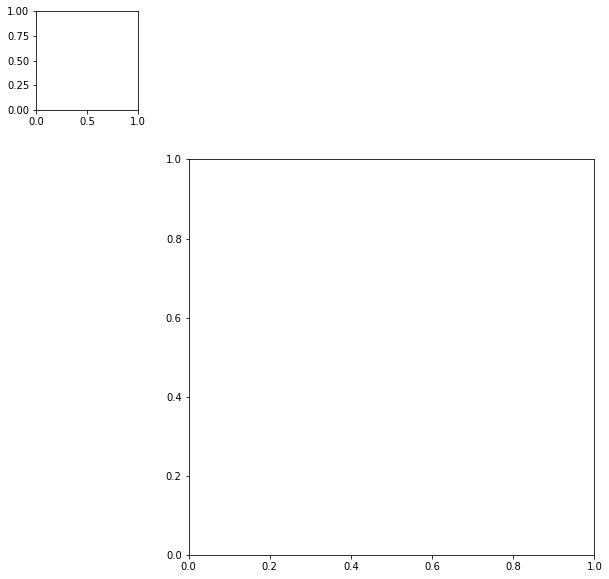

In [248]:
cont_corrmap = sns.clustermap(cont_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
cont_corrmap.ax_row_dendrogram.set_visible(False)
cont_corrmap.ax_col_dendrogram.set_visible(False)

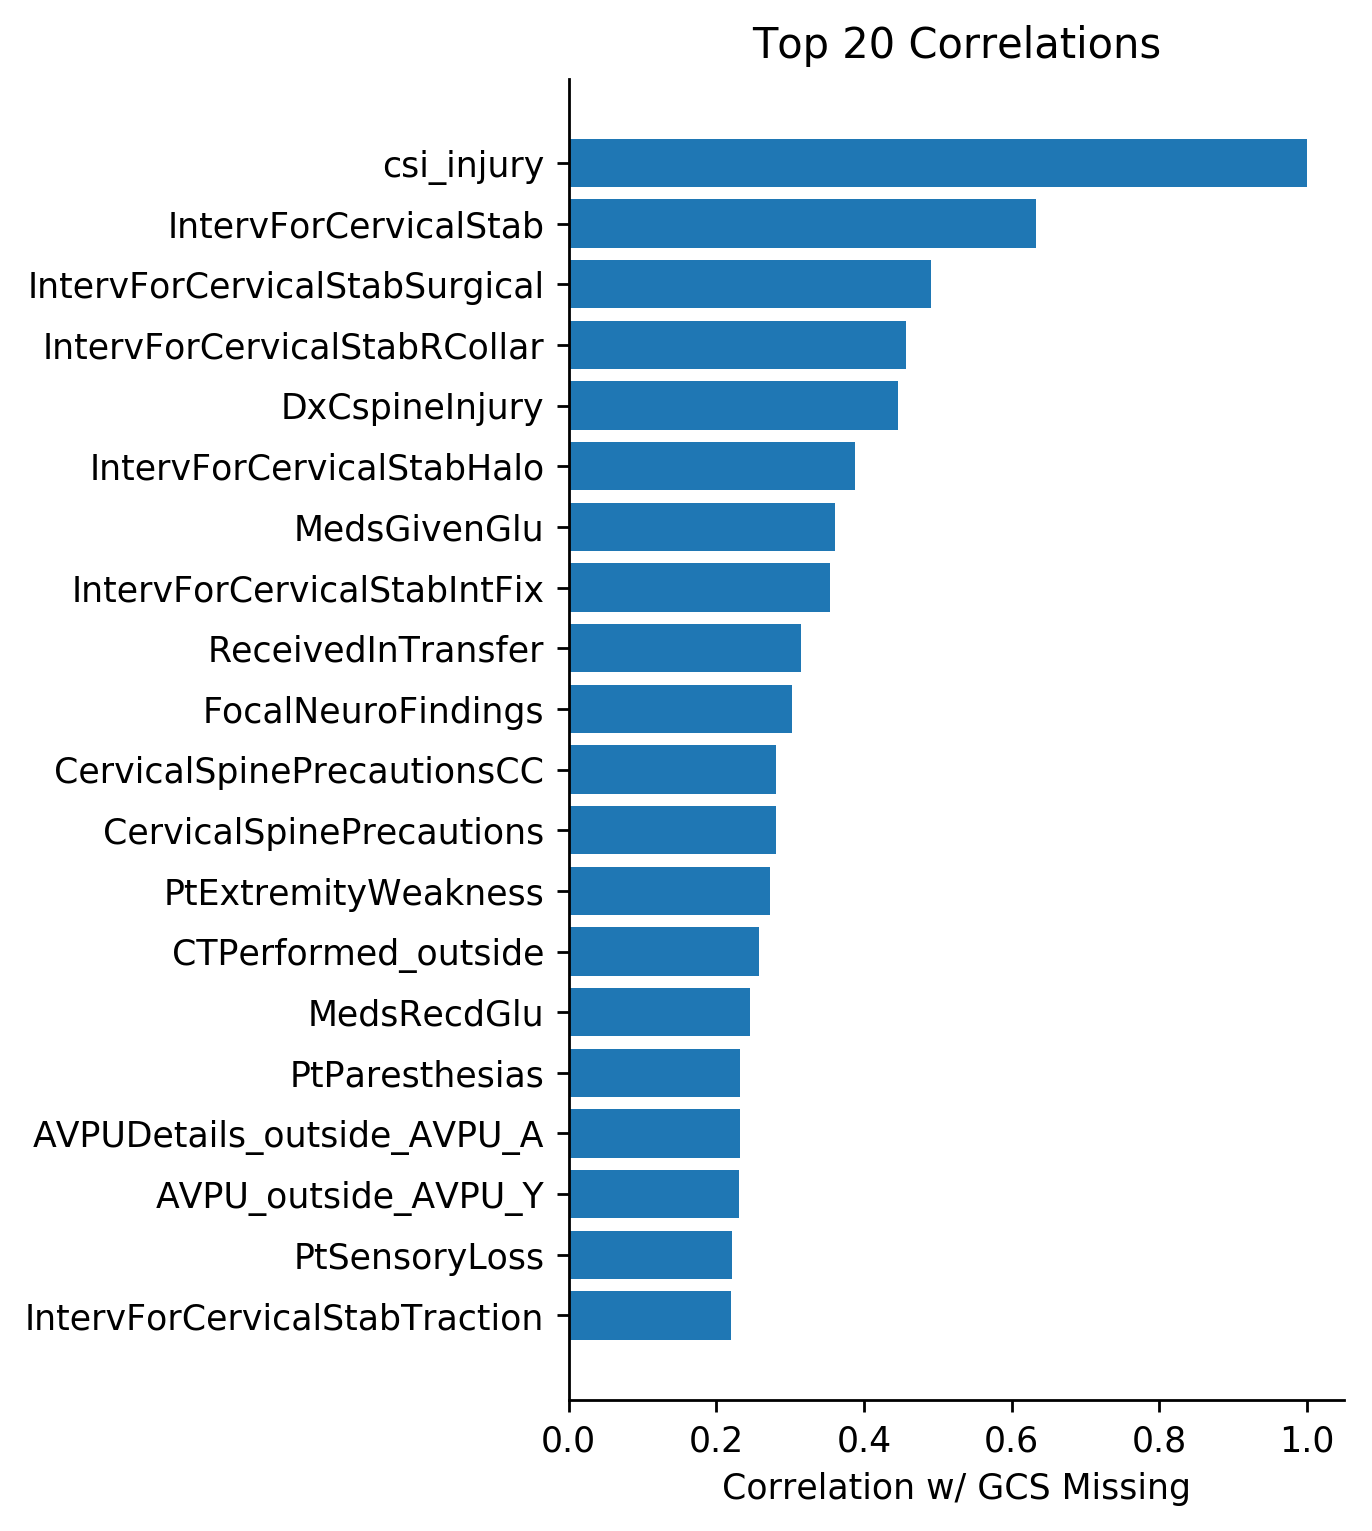

In [277]:
plt.figure(dpi=250, figsize=(4, 7))
#vals = binary_corrs[outcome_def]
vals = binary_corrs['csi_injury']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[-20:], vals[args][-20:])
plt.xlabel('Correlation w/ GCS Missing')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Top 20 Correlations")
plt.show()

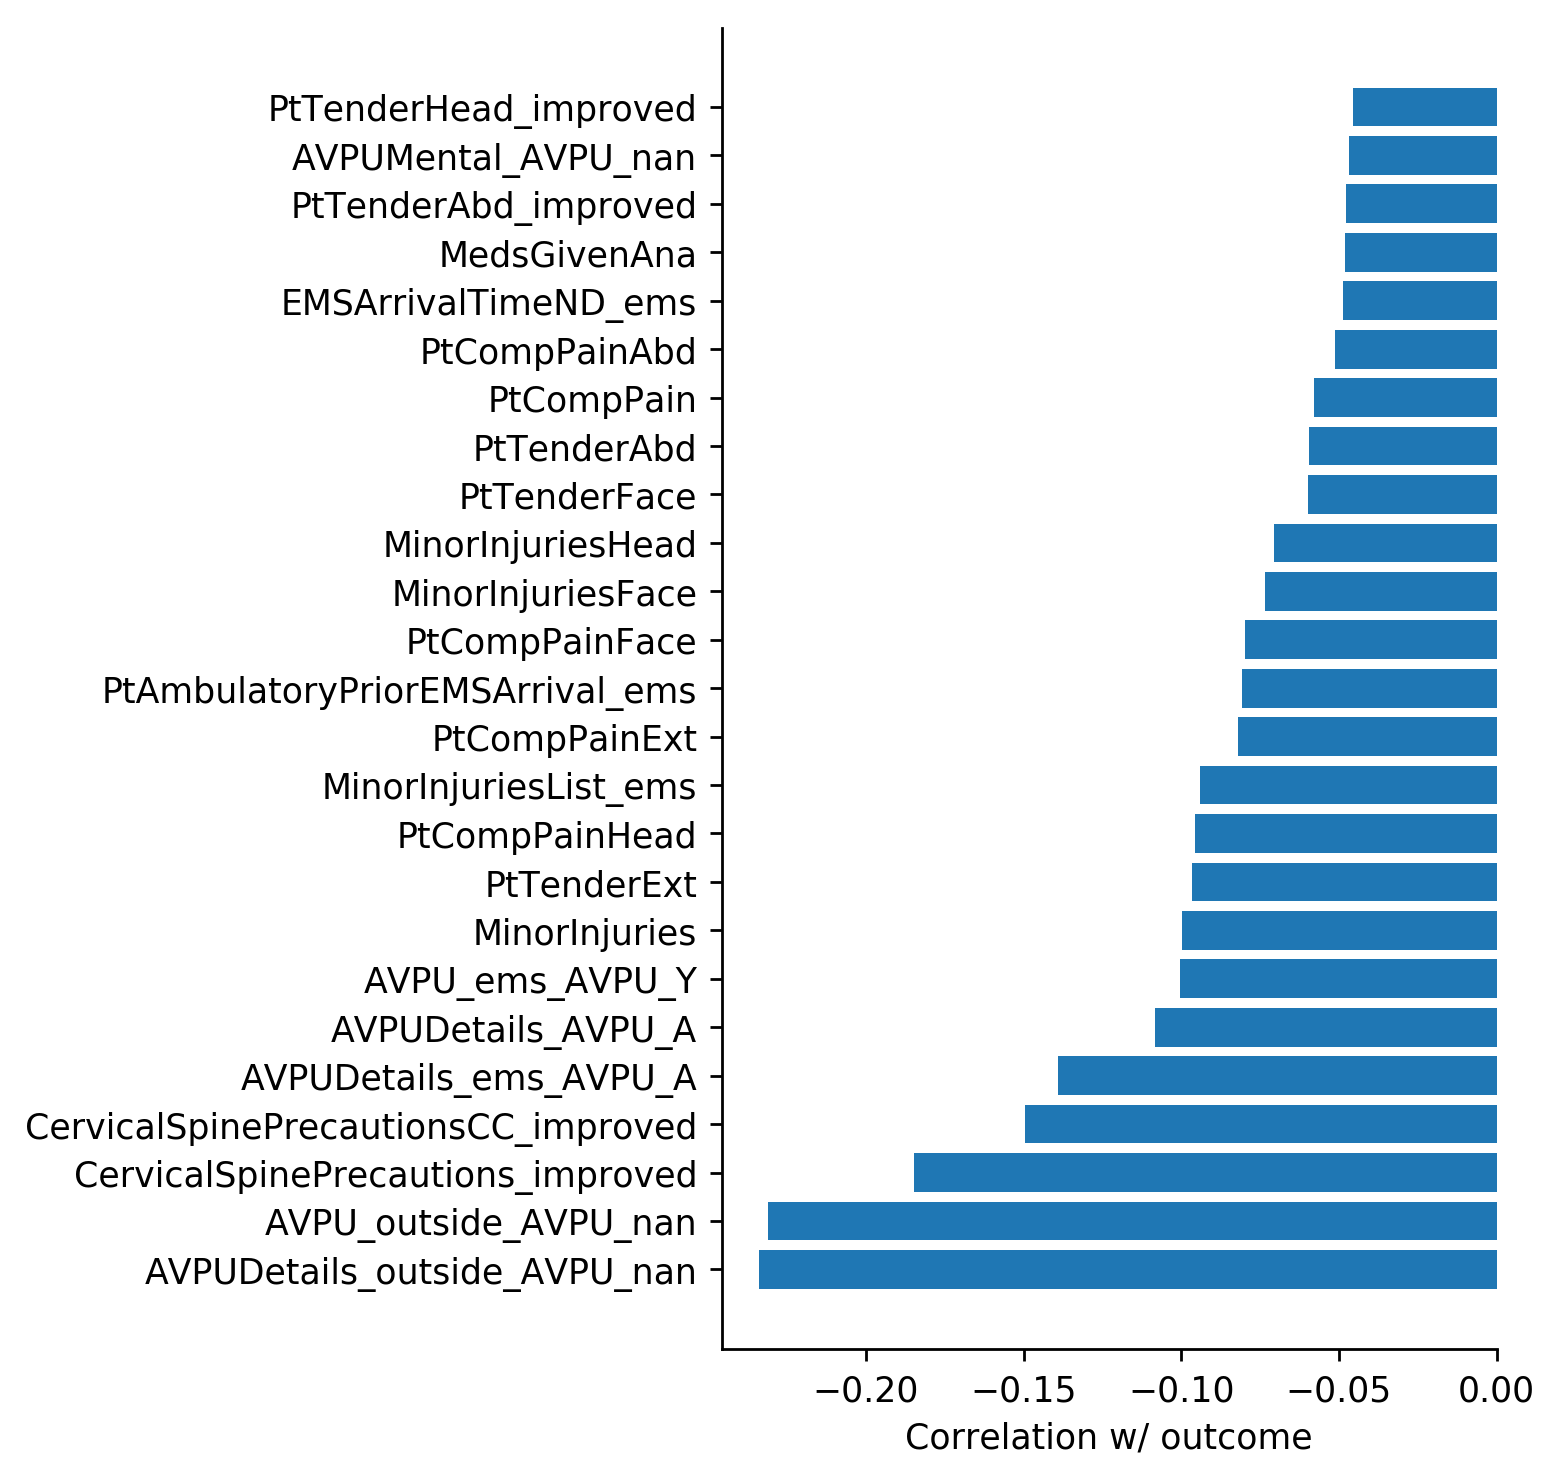

In [278]:
plt.figure(dpi=250, figsize=(4, 7))
vals = binary_corrs['csi_injury']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:25], vals[args][:25])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [280]:
list(binary_imputed_data.columns)

['AlteredMentalStatus',
 'LOC',
 'FocalNeuroFindings',
 'PainNeck',
 'PosMidNeckTenderness',
 'TenderNeck',
 'Torticollis',
 'SubInj_Head',
 'SubInj_Face',
 'SubInj_Ext',
 'SubInj_TorsoTrunk',
 'Predisposed',
 'HighriskDiving',
 'HighriskFall',
 'HighriskHanging',
 'HighriskHitByCar',
 'HighriskMVC',
 'HighriskOtherMV',
 'AxialLoadAnyDoc',
 'axialloadtop',
 'Clotheslining',
 'EMSArrivalDateND_ems',
 'EMSArrivalTimeND_ems',
 'PtTenderOther_ems',
 'OtherInjuriesExtr_ems',
 'MinorInjuriesPel_ems',
 'EDArrivalDateND_outside',
 'EDArrivalTimeND_outside',
 'MedsRecdOth_outside',
 'PtTenderNeckLevelOther_outside',
 'MinorInjuriesPelvis_outside',
 'ArrivalTimeND',
 'CervicalSpineImmobilization',
 'CervicalSpineIntervCC',
 'CervicalSpineIntervRLB',
 'CervicalSpineIntervOther',
 'MedsRecdAna',
 'MedsRecdGlu',
 'MedsRecdPar',
 'MedsRecdSed',
 'MedsRecdOR',
 'PtCompPainHead',
 'PtCompPainFace',
 'PtCompPainChest',
 'PtCompPainBack',
 'PtCompPainFlank',
 'PtCompPainAbd',
 'PtCompPainPelvis',
 'PtCo

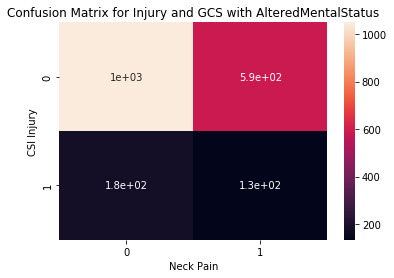

In [307]:
cc_data = binary_imputed_data#[(binary_imputed_data['NonVerbal']==1)]
#confusion_matrix = pd.crosstab(cc_data['HighriskDiving'], cc_data['IntervForCervicalStabSurgical'], rownames=['CSI Injury'], colnames=['Neck Pain'])
#confusion_matrix = pd.crosstab(cc_data['csi_injury'], cc_data['PtTenderNeck'], rownames=['CSI Injury'], colnames=['Neck Pain'])

sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix for Injury and GCS with AlteredMentalStatus")
plt.show()


In [311]:
intervention_types = [col_name for col_name in binary_imputed_data if 'IntervFor' in col_name]
injury_types = [col_name for col_name in binary_imputed_data if 'Highrisk' in col_name]

intervention_data = binary_imputed_data[injury_types+intervention_types]

In [317]:
for injury in injury_types:
    intervention_information = intervention_data.drop([i for i in injury_types if i is not injury],axis=1)
    summary_data = intervention_information.groupby([injury]).mean()
    print(summary_data)

                 HighriskDiving  HighriskFall  IntervForCervicalStabSCollar  \
HighriskHanging                                                               
0.0                    0.010758      0.041496                      0.043545   
1.0                    0.000000      0.000000                      0.000000   

                 IntervForCervicalStabRCollar  IntervForCervicalStabBrace  \
HighriskHanging                                                             
0.0                                  0.149078                    0.007172   
1.0                                  0.000000                    0.000000   

                 IntervForCervicalStabTraction  IntervForCervicalStabSurgical  \
HighriskHanging                                                                 
0.0                                   0.009221                        0.04457   
1.0                                   0.000000                        0.00000   

                 IntervForCervicalStabHalo  Inter

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(binary_imputed_data[(binary_imputed_data['csi_injury']==1)&(binary_imputed_data['GCS_na']==0)])

                                   AlteredMentalStatus  LOC  \
id      case_id site control_type                             
110001  110001  1    case                          1.0  1.0   
110021  110021  1    case                          0.0  0.0   
110019  110019  1    case                          0.0  1.0   
110002  110002  1    case                          0.0  0.0   
110011  110011  1    case                          0.0  0.0   
110007  110007  1    case                          0.0  0.0   
110015  110015  1    case                          0.0  0.0   
110004  110004  1    case                          0.0  0.0   
110022  110022  1    case                          1.0  0.0   
110020  110020  1    case                          0.0  0.0   
110017  110017  1    case                          0.0  0.0   
110003  110003  1    case                          0.0  0.0   
210165  210165  2    case                          0.0  1.0   
210163  210163  2    case                          0.0 

In [24]:
print(eda_df['TotalGCS'])

id       case_id  site  control_type
110001   110001   1     case             3.0
110021   110021   1     case            15.0
110019   110019   1     case            15.0
110002   110002   1     case            15.0
110011   110011   1     case            15.0
                                        ... 
1723134  1713099  17    ems             15.0
1723165  1713124  17    ems             15.0
1723141  1713104  17    ems             15.0
1723147  1713105  17    ems             15.0
1723135  1713119  17    ems             15.0
Name: TotalGCS, Length: 1704, dtype: float64


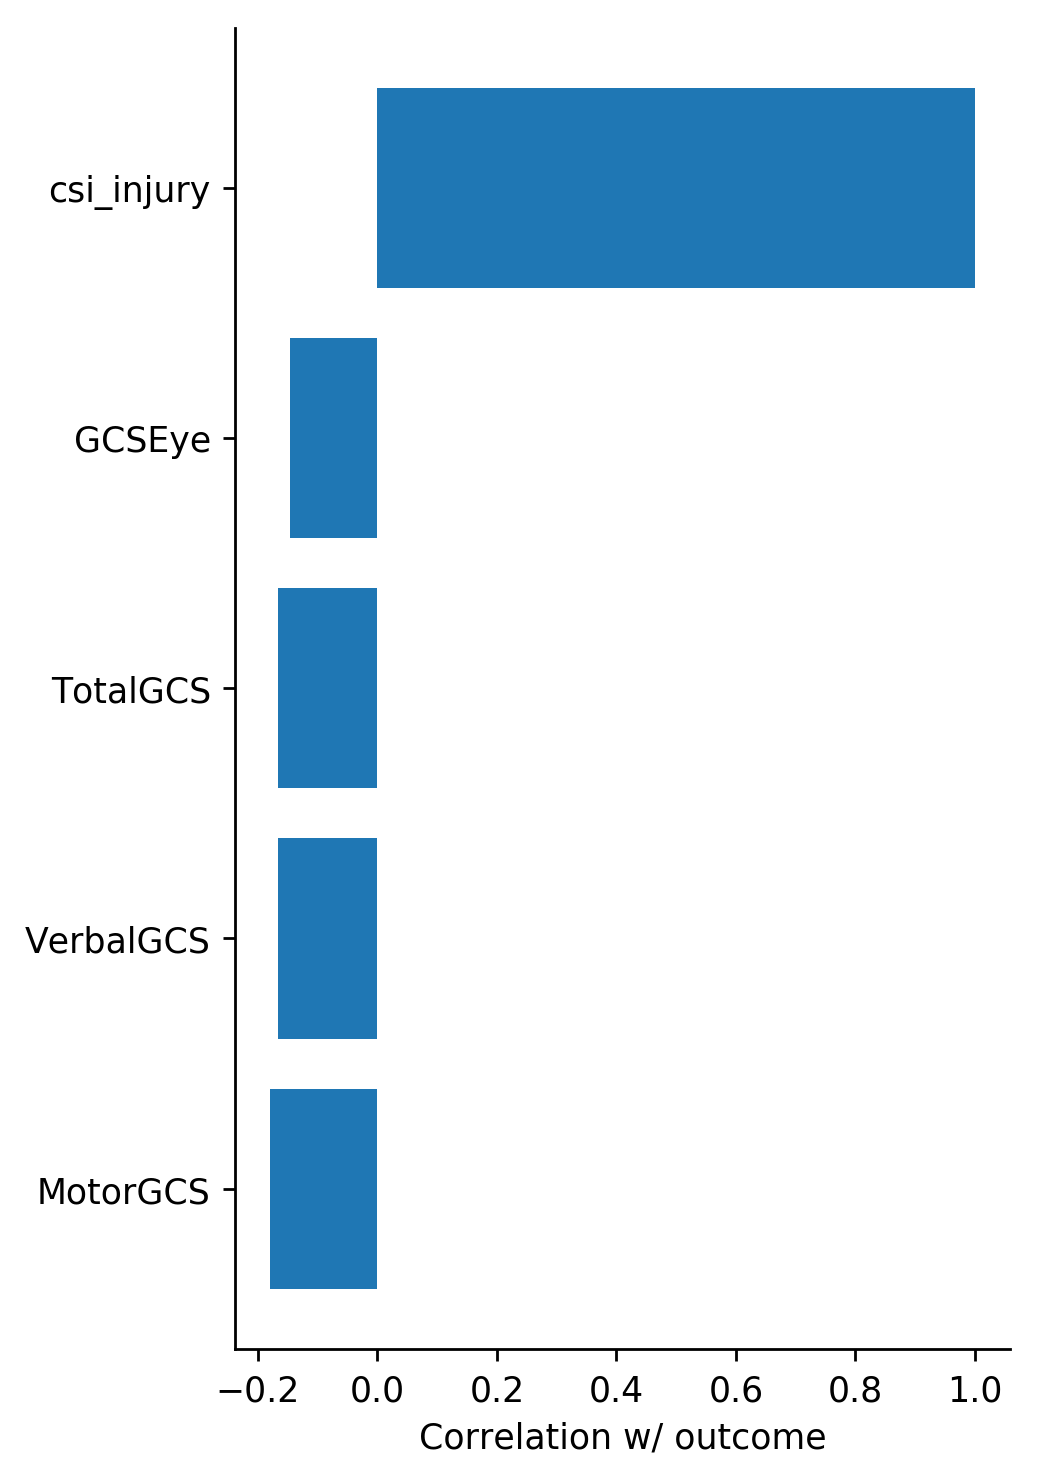

In [25]:
plt.figure(dpi=250, figsize=(4, 7))
vals = cont_corrs[outcome_def]
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs, vals[args])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(binary_corrs['GCS_NA_total'].sort_values())

KeyError: 'GCS_NA_total'

In [ ]:
# EDA of Missingness

In [ ]:
# get percent missing by column
pd.set_option("display.max_rows", None, "display.max_columns", None)
print("25 Covariates with Highest Percent Missingness\n")
print("All Covariates:")
missing_frac = (eda_df.isna().sum() / eda_df.shape[0]) * 100
print(missing_frac.sort_values(ascending=False)[:])

In [ ]:
complete_covar = missing_frac[missing_frac==0.]
print("Covar. with no missing data:",len(complete_covar))

missing_columns = missing_frac[missing_frac!=0]
print("Covar. with some missing data:",len(missing_columns))

In [ ]:
binary_missing_bools = eda_df[missing_columns.index].isna()
binary_missing_corrs = binary_missing_bools.corr(method='spearman')

In [ ]:
corrmap = sns.clustermap(binary_missing_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)
plt.title("Correlation of Missigness by Covariate")

In [ ]:
print(max(binary_missing_corrs))

In [ ]:
print(sorted(binary_missing_corrs.iloc[:,3]))

In [ ]:
# EDA of Demographic Data

In [ ]:
eda_demographic_df = pd.read_csv("data/csi_pecarn/raw/demographics.csv").set_index(["studysubjectid"])
print(eda_demographic_df.columns)

In [ ]:
gender_df = eda_demographic_df.groupby('site')['Gender'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Gender Variable Across Study Sites')
gender_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
race_df = eda_demographic_df.groupby('site')['Race'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Race Variable Across Study Sites')
race_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
ethnicity_df = eda_demographic_df.groupby('site')['Ethnicity'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Ethnicity Variable Across Study Sites')
ethnicity_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
payor_df = eda_demographic_df.groupby('site')['PayorType'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Payor Type Across Study Sites')
payor_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
age_df = eda_demographic_df[['site','AgeInYears']]


bins = [0, 2, 5, 10, 13, np.inf]
names = ['<2', '2-5', '5-10', '10-13', '13+']

age_df.loc[:,['AgeBin']] = pd.cut(age_df.loc[:,'AgeInYears'], bins, labels=names)

age_range_df = age_df.groupby('site')['AgeBin'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Age Range Across Study Sites')
age_range_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.show()
